## W2M5 - Sentiment Analysis

In [31]:
import pandas as pd

# 파일 불러오기
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding = 'ISO-8859-1', header = None)
df.columns = ['sentiment', 'ID', 'timestamp', 'flag', 'username', 'text']
df

,sentiment,ID,timestamp,flag,username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [32]:
# sentiment별 데이터 나누기
# 20000개씩 sampling
negative_df = df[df['sentiment'] == 0].sample(20000)
positive_df = df[df['sentiment'] == 4].sample(20000)

In [33]:
# text 열의 모든 문자열 데이터 연결해서 하나의 긴 문자열로 만들기
negative_text = " ".join(negative_df['text'].astype(str))
positive_text = " ".join(positive_df['text'].astype(str))

In [34]:
from wordcloud import WordCloud

# Wordcloud 생성
negative_wordcloud = WordCloud(max_words=200).generate(negative_text)
positive_wordcloud = WordCloud(max_words=200).generate(positive_text)

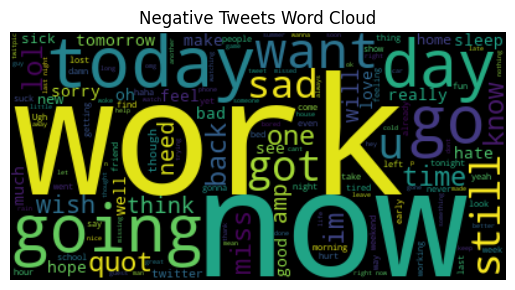

In [35]:
# Negative wordcloud
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(negative_wordcloud, interpolation = 'bilinear')
plt.title("Negative Tweets Word Cloud")
plt.axis('off')
plt.show()

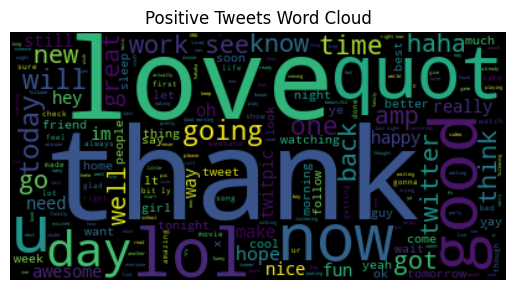

In [36]:
# Positive wordcloud
plt.figure()
plt.imshow(positive_wordcloud, interpolation = 'bilinear')
plt.title("Positive Tweets Word Cloud")
plt.axis('off')
plt.show()

Negative에서는 'work', 'now', 'want', 'wish'가 부정적인 단어로 많이 쓰인다.</br>
Positive에서는 'thank', 'love', 'haha', 'lol'가 긍정적인 단어로 많이 쓰인다.</br>
전체적으로 납득이 가는 단어들이 나타나지만, 'quot'나 'amp'와 같이 감정과는 무관해보이고, 두 감정 모두에 공통적으로 나타나는 단어들도 존재한다. 더욱 더 의미있는 단어들을 추출하기 위해서는 전처리를 통해 이들을 제거해주어야할 것이다.

## 팀 활동 요구사항

제공된 데이터셋과 유사한 데이터셋을 웹 스크레이핑을 통해 만든 다음, word cloud를 만들어 봅시다.</br>
데이터셋을 만들 때 어떤 작업들이 추가적으로 필요할까요?</br>
prototyping에는 최소 1,000개 이상의 데이터를 사용하세요.

우리는 Google Play에서 '현대 블루링크' 앱의 리뷰를 웹 스크레이핑하여 데이터셋을 만들었다.

In [37]:
from google_play_scraper import app, reviews
import pandas as pd

# 현대 블루링크 앱 리뷰 웹 스크래핑
package_name = "com.velox.hkmc_tm1k"
app_info = app(package_name)
print("앱 이름:", app_info['title'])

review_list = []

# 앱 리뷰 가져오기
# 별점 1 ~ 4 각각 400개씩
for i in range(1,5) :
    reviews_result, _ = reviews(
        package_name,
        lang='ko',  # 한국어
        country='kr',  # 한국 사용자
        count=400,  # 가져올 리뷰 수
        filter_score_with= i  # 특정 평점 필터링
    )
    for review in reviews_result:
        review_list.append({'rating' : review['score'], 'review' : review['content']})

# 별점 5 800개
reviews_result, _ = reviews(
    package_name,
    lang='ko',  
    country='kr',
    count=800,  
    filter_score_with=5
)
for review in reviews_result:
    review_list.append({'rating' : review['score'], 'review' : review['content']})


review_data = pd.DataFrame(review_list)
review_data

앱 이름: 현대 블루링크


,rating,review
0,1,SNS 아이디로 로그인 할 수 있게 버튼을 만들어달라.
1,1,업데이트 이후 빌트인캠상태 먹통입니딘
2,1,업데이트를 강제함
3,1,"포터2 lpg 최신네비에 블루링크가 문 열기 닫기만 될거면, 블루링크 쓰는 의미가 ..."
4,1,아무말도없이 갑자기 차량설정기능삭제하면 어쩝니까 원복바랍니다
...,...,...
2395,5,편리하게 잘 만들었어요
2396,5,편합니다
2397,5,기능추가요청 캠핑가서 차박할때 뒷창문만 모기장을 설치하는데 자다가 더우면 창문을 블...
2398,5,형통~


감성 라벨링 기준은 다음과 같다.
- positive : rating 5
- neutral  : rating 3, 4
- negative : rating 1, 2 </br>
통상적으로 1, 2는 매우 부정적인 경험을 했던 상황에서 매기는 별점이고, 3, 4는 불편하지는 않지만 아쉬움이 남을 때 주는 별점이라고 생각하였기에 이를 기준으로 레이블을 달아주었다.</br>
감성 라벨의 데이터 수를 균등하게 맞추기 위해 별점이 1 ~ 4인 경우는 400개, 5인 경우는 500개를 가져오도록 하였다.

In [38]:
# 감성 라벨링
review_data['sentiment'] = review_data['rating'].apply(lambda x : 'positive' if x == 5 else ('negative' if x in (1,2) else 'neutral'))
review_data

,rating,review,sentiment
0,1,SNS 아이디로 로그인 할 수 있게 버튼을 만들어달라.,negative
1,1,업데이트 이후 빌트인캠상태 먹통입니딘,negative
2,1,업데이트를 강제함,negative
3,1,"포터2 lpg 최신네비에 블루링크가 문 열기 닫기만 될거면, 블루링크 쓰는 의미가 ...",negative
4,1,아무말도없이 갑자기 차량설정기능삭제하면 어쩝니까 원복바랍니다,negative
...,...,...,...
2395,5,편리하게 잘 만들었어요,positive
2396,5,편합니다,positive
2397,5,기능추가요청 캠핑가서 차박할때 뒷창문만 모기장을 설치하는데 자다가 더우면 창문을 블...,positive
2398,5,형통~,positive


In [39]:
# sentiment 별 데이터 나누기
negative_data = review_data[review_data['sentiment'] == 'negative']
neutral_data = review_data[review_data['sentiment'] == 'neutral']
positive_data = review_data[review_data['sentiment'] == 'positive']

In [40]:
# review 열의 모든 문자열을 하나의 긴 문자열로 변환
negative_text = " ".join(negative_data['review'].astype(str))
neutral_text = " ".join(neutral_data['review'].astype(str))
positive_text = " ".join(positive_data['review'].astype(str))

의미있는 wordcloud를 만들기 위해서는 Negative한 반응을 보이는 사람들의 주된 원인을 찾아야할 것이다. '블루링크' 등과 같이 언급하는 빈도는 많지만, 실질적으로 얻을 수 있는 인사이트가 없는 것들을 제외하기 위하여 텍스트를 전처리한다.

In [27]:
# 데이터 전처리
from konlpy.tag import Okt

okt = Okt()

# 조사 제거 함수
def remove_josa(text):
    tokens = okt.pos(text)  # 형태소 분석 및 품사 태깅
    filtered_tokens = [word for word, tag in tokens if tag != 'Josa']  # 조사를 제외
    return " ".join(filtered_tokens)  # 다시 문장으로 합치기

# 불용어 제거
def remove_stopwords(text) :
    file_path = "stopwords-ko.txt" # 일반적인 한국어 불용어 파일
    app_stopwords = ['블루', '링크', '블루링크', '앱'] # 빈도는 많지만 목적에 맞지 않은 단어들을 불용어로 추가
    with open(file_path, "r", encoding="utf-8") as file:
        stopwords = file.read().splitlines()
    # 불용어 추가
    stopwords.extend(app_stopwords)
    # 불용어 매핑 후 제거
    filtered_words = [word for word in text.split() if word not in stopwords]
    return " ".join(filtered_words)

# 전처리 함수
def preprocessed(text) :
    remove1 = remove_josa(text)
    remove2 = remove_stopwords(remove1)
    return remove2

negative_text = preprocessed(negative_text)
neutral_text = preprocessed(neutral_text)
positive_text = preprocessed(positive_text)

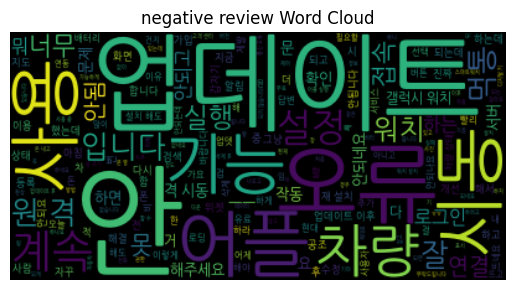

In [28]:
# Negative wordcloud
negative_wordcloud = WordCloud(font_path='/Users/admin/Library/Fonts/NanumGothic.otf',max_words=200).generate(negative_text)

plt.figure()
plt.imshow(negative_wordcloud, interpolation = 'bilinear')
plt.title("negative review Word Cloud")
plt.axis('off')
plt.show()

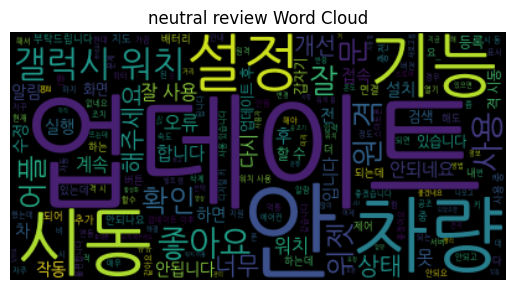

In [29]:
# Netural wordcloud
neutral_wordcloud = WordCloud(font_path='/Users/admin/Library/Fonts/NanumGothic.otf',max_words=200).generate(neutral_text)

plt.figure()
plt.imshow(neutral_wordcloud, interpolation = 'bilinear')
plt.title("neutral review Word Cloud")
plt.axis('off')
plt.show()

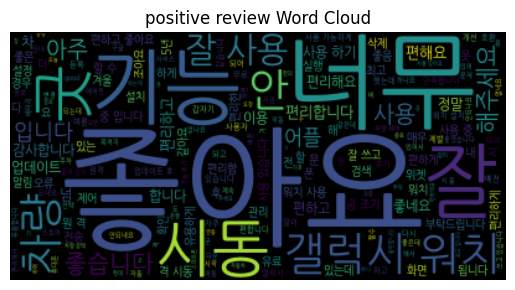

In [30]:
# Positive wordcloud
positive_wordcloud = WordCloud(font_path='/Users/admin/Library/Fonts/NanumGothic.otf',max_words=200).generate(positive_text)

plt.figure()
plt.imshow(positive_wordcloud, interpolation = 'bilinear')
plt.title("positive review Word Cloud")
plt.axis('off')
plt.show()

먼저 부정적인 감정을 가지고 있는 앱 경험자의 리뷰를 통해 앱이 개선해야하는 사항에 대해서 알 수 있다. 그렇기에 추가적으로 사내에서 앱을 개발한다면, 그 문제점을 염두하며, 개발을 진행할 수 있을 것이다. 어플의 통신 문제가 대부분. 부정적 리뷰를 쓴 사람들의 차량 데이터를 수집할 수 있다면 더 개선을 더할 수 있을 것이다.
긍정적인 텍스트를 보면 사용자들이 앱의 어떤 부분에서 편리함을 느끼고, 새로운 사용자 경험을 느끼고 있는지 알 수 있을 것이다.
추가적으로 앱의 버젼도 웹 스크래이핑이 가능한데, 이를 통해 데이터를 세분화한다면 버젼의 변화에 따라 문제 사항이 변화하는 추이를 알 수 있을 것이다.
다른 경쟁사에서 동일하게 진행을 한다면 비교를 통해 개선할 점을 찾는 것이 가능할 것이다.